In [1]:
%matplotlib inline

In [2]:
import numpy as np
import h5py
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import rc
import matplotlib as mpl

In [3]:
rc('font',size=18)

In [4]:
class Dump:
    def __init__(self, filename):
        with h5py.File(filename, 'r') as f:
            self.t = f['Info'].attrs['Time']
            self.xf = f['Locations/x'][0,:]
            self.xc = f['VolumeLocations/x'][0,:]
            self.press = f['pressure'][0,0,0:,0]
            self.v = f['p.velocity'][0,0,0,:,0]
            self.p = f['c.momentum'][0,0,0,:,0]
            self.rhop = f['p.density'][0,0,0,:,0]
            self.rhoc = f['c.density'][0,0,0,:,0]
            self.epsc = f['c.energy'][0,0,0,:,0]
            self.epsp = f['p.energy'][0,0,0,:,0]

In [5]:
from glob import glob
filenames = sorted(glob('tov.out1.*.phdf'))

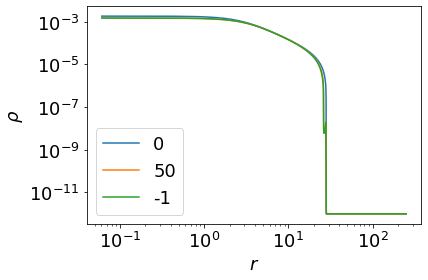

In [6]:
for i in [0, 50, -1]:
    dump = Dump(filenames[i])
    plt.loglog(dump.xc, dump.rhop,label=f'{i}')
plt.legend()
plt.xlabel(r'$r$')
plt.ylabel(r'$\rho$')
plt.savefig('yucky.png')

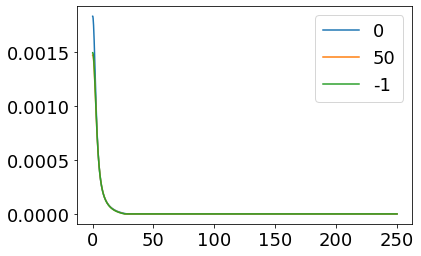

In [7]:
for i in [0, 50, -1]:
    dump = Dump(filenames[i])
    plt.plot(dump.xc, dump.rhop,label=f'{i}')
plt.legend()

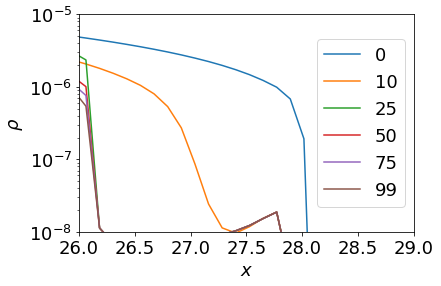

In [8]:
for i in [0, 10, 25, 50,75, 99]:
    dump = Dump(filenames[i])
    plt.semilogy(dump.xc, dump.rhop,label=f'{i}')
plt.legend(loc='center right')
plt.xlim(26,29)
plt.ylim(1e-8,1e-5)
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho$')
plt.savefig('tov_cowling_stellar_edge.png',bbox_inches='tight')

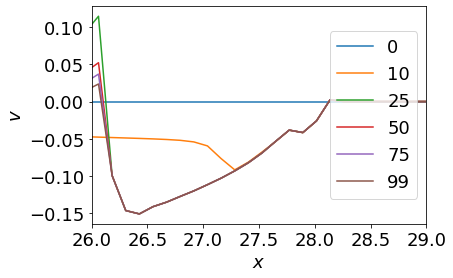

In [9]:
for i in [0, 10, 25, 50,75, 99]:
    dump = Dump(filenames[i])
    plt.plot(dump.xc, dump.v,label=f'{i}')
plt.legend(loc='center right')
plt.xlim(26,29)
#plt.ylim(1e-11,1e-7)
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.savefig('tov_cowling_stellar_edge.png',bbox_inches='tight')

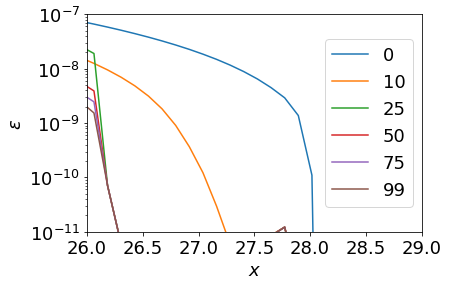

In [10]:
for i in [0, 10, 25, 50,75, 99]:
    dump = Dump(filenames[i])
    plt.semilogy(dump.xc, dump.epsp,label=f'{i}')
plt.legend(loc='center right')
plt.xlim(26,29)
plt.ylim(1e-11,1e-7)
plt.xlabel(r'$x$')
plt.ylabel(r'$\varepsilon$')
plt.savefig('tov_cowling_stellar_edge.png',bbox_inches='tight')

In [11]:
rhops = []
times = []
for fnam in filenames:
    d = Dump(fnam)
    times.append(d.t)
    rhops.append(d.rhop[0])

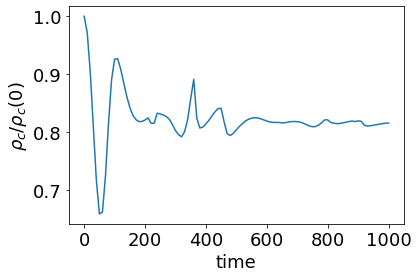

In [12]:
plt.plot(times,rhops/rhops[0])
plt.xlabel('time')
plt.ylabel(r'$\rho_c/\rho_c(0)$')
plt.savefig('tov_cowling_oscillations.png',bbox_inches='tight')